# Yelp Restaurant Recommendation System 
(improving Yelp's recommendation system using sentiment analysis)

## Table of Contents
- [Introduction](#introduction)
- [Cleaning and Setup](#Cleaning-and-Setup)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

### Introduction
This project aims to try to improve Yelp's restaurant recommendation system by using sentiment analysis on customer reviews. By analyzing the text and user star ratings, we will predict user preferences and enhance the system's ability to recommend businesses based on the content of reviews. 

### Cleaning and Setup


In [10]:
import json
import pandas as pd

#import the file
review_file = "./data/yelp_academic_dataset_review.json"

#open json in read mode and read all lines from the file
with open(review_file, 'r', encoding='utf-8') as file:
    input_lines = file.readlines()

#parse through the json lines and make it into a python object
reviews = [json.loads(line) for line in input_lines]

#store into a pandas dataframe
reviews_df = pd.DataFrame(reviews)

#look at first few lines
reviews_df.head()


#Do the same for the business file
business_file = './data/yelp_academic_dataset_business.json'
with open(business_file, 'r', encoding='utf-8') as file1:
    input_lines = file1.readlines()
businesses = [json.loads(line) for line in input_lines]
businesses_df = pd.DataFrame(businesses)
businesses_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


The dataset that Yelp provided has many businesses, many of which are not restaurants. I thus will filter only the businesses that have categories labeled as 'resturant'.


In [8]:
#restaurants_df will hold the businesses
#restaurants_reviews_df will hold the reviews
restaurants_df = businesses_df[businesses_df['categories'].str.contains('Restaurants', na=False)]
restaurants_reviews_df = reviews_df[reviews_df['business_id'].isin(restaurants_df['business_id'])]
restaurants_df.head()
restaurants_reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [11]:
#check for any sort of missing values
restaurants_df.isna().sum()
restaurants_reviews_df.isna().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       565
categories         0
hours           7278
dtype: int64

### Exploratory Data Analysis

The yelp dataset contains 6,990,280 reviews across 150,346 businesses. We will be looking at the distribution of star ratings as well as some geographical analysis on them. 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#mean and median number of reviews
mean_reviews = restaurants_df['review_count'].mean()
median_reviews = restaurants_df['review_count'].median()

#the average star rating of a restaurant
average_star_rating = restaurants_df['stars'].mean()

print(f"Mean number of reviews: {mean_reviews}")
print(f"Median number of reviews: {median_reviews}")
print(f"Average star rating: {average_star_rating}")


Mean number of reviews: 87.26714241983623
Median number of reviews: 33.0
Average star rating: 3.5151718068416624


C:\Users\matth\AppData\Local\Temp\ipykernel_17992\796001212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=reviews_df, palette='viridis')


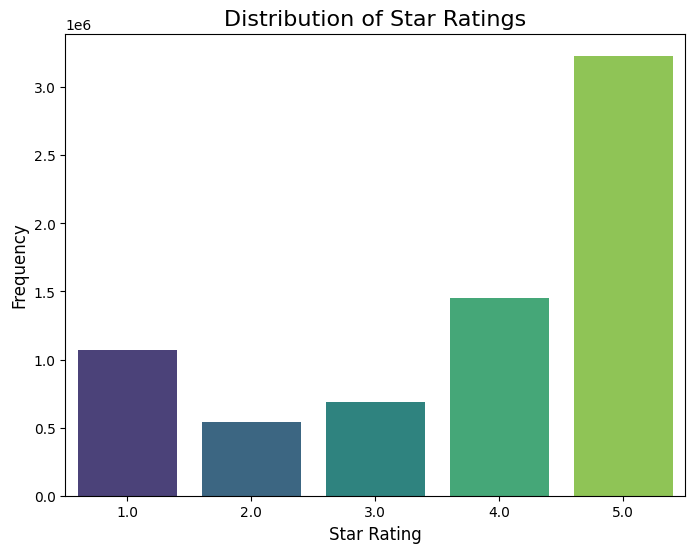

In [17]:
#distribution plot of star ratings
plt.figure(figsize=(8,6))
sns.countplot(x='stars', data=reviews_df, palette='viridis')

#adding titles and labels
plt.title('Distribution of Star Ratings', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()